In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [2]:
!kaggle datasets download -d skillsmuggler/amazon-ratings

Dataset URL: https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings
License(s): CC0-1.0
  0% 0.00/28.8M [00:00<?, ?B/s]
100% 28.8M/28.8M [00:00<00:00, 909MB/s]


In [3]:
!unzip /content/drive/MyDrive/kaggle/amazon-ratings.zip -d /content/drive/MyDrive/kaggle/

Archive:  /content/drive/MyDrive/kaggle/amazon-ratings.zip
  inflating: /content/drive/MyDrive/kaggle/ratings_Beauty.csv  


In [1]:
import pandas as pd

In [2]:
df_beauty_ratings = pd.read_csv('/content/drive/MyDrive/kaggle/ratings_Beauty.csv')

In [3]:
df_beauty_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
df_beauty_ratings.drop('Timestamp', axis=1, inplace=True)

In [5]:
df_beauty_ratings.head()

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder_product = LabelEncoder()

# Fit and transform the 'ProductId' column
df_beauty_ratings['ProductId'] = label_encoder_product.fit_transform(df_beauty_ratings['ProductId'])

# Initialize the LabelEncoder
label_encoder_user = LabelEncoder()

# Fit and transform the 'ProductId' column
df_beauty_ratings['UserId'] = label_encoder_user.fit_transform(df_beauty_ratings['UserId'])



In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_beauty_ratings, test_size=0.25, random_state=42)

In [8]:
len(train_data["UserId"].unique())

976271

In [9]:
len(train_data["ProductId"].unique())

220410

In [10]:
### testing each users bias

In [11]:
df_user_bias = pd.DataFrame({"Rating": train_data.groupby("UserId")["Rating"].mean(), "Count": train_data.groupby("UserId")["Rating"].count()})

In [12]:
df_user_bias.sort_values(by=["Count", "Rating"], ascending=False)

,Rating,Count
UserId,,
821601,3.730104,289
391642,4.788235,255
835886,4.448560,243
831533,4.502326,215
597619,4.400990,202
...,...,...
1210240,1.000000,1
1210243,1.000000,1
1210250,1.000000,1


In [13]:
df_user_bias.reset_index(inplace=True)

In [14]:
### 976271 users rating 220410 products

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-16-2603143316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_user_bias["Count"])


<Axes: xlabel='Count', ylabel='Density'>

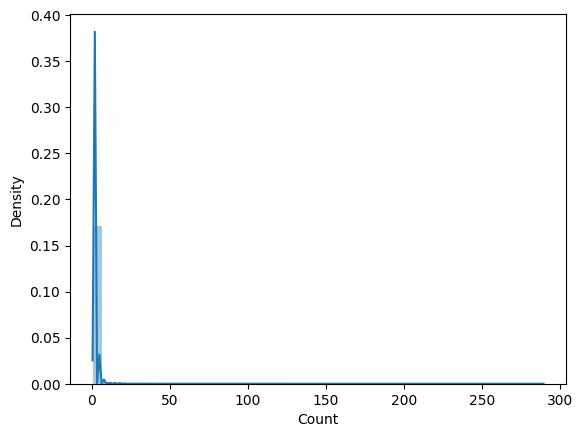

In [16]:
sns.distplot(df_user_bias["Count"])

In [17]:
len(df_user_bias[df_user_bias['Count']>5])

22377

In [18]:
## Considering only users who rated atleast 5

df_user_bias = df_user_bias[df_user_bias['Count']>5]

In [19]:
### Similar with products

In [20]:
df_product_ratings = pd.DataFrame({"Rating": train_data.groupby("ProductId")["Rating"].mean(), "Count": train_data.groupby("ProductId")["Rating"].count()})

In [21]:
df_product_ratings.sort_values(by=["Count", "Rating"], ascending=False)

,Rating,Count
ProductId,,
65766,4.318094,5687
10516,3.594889,2113
110873,4.307364,1874
2365,4.414409,1624
105018,4.371069,1590
...,...,...
249119,1.000000,1
249165,1.000000,1
249186,1.000000,1


In [22]:
len(df_product_ratings[df_product_ratings['Count']>5])

46368

In [23]:
df_product_ratings = df_product_ratings[df_product_ratings['Count']>5]

In [24]:
df_product_ratings.reset_index(inplace=True)

In [25]:
train_data = train_data[train_data['UserId'].isin(df_user_bias['UserId'])]

In [26]:
train_data = train_data[train_data['ProductId'].isin(df_product_ratings['ProductId'])]

In [27]:
len(train_data)

182976

In [31]:
train_data.head()

,UserId,ProductId,Rating
1811054,381533,201488,5.0
629534,704413,54771,2.0
1724646,134868,187518,5.0
257833,884122,18045,2.0
1705651,885914,184194,5.0


In [28]:
### Content based recommendation is done based content descriptions. Attempting collaboraive filtering

### Utility Matrix Method

In [29]:
user_item_interactions = train_data.pivot_table(index='UserId', columns='ProductId', values='Rating')

In [30]:
user_item_interactions

ProductId,62,77,84,91,111,115,133,168,169,174,...,249211,249212,249217,249222,249236,249241,249250,249261,249264,249268
UserId,,,,,,,,,,,,,,,,,,,,,
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
user_item_interactions.fillna(0, inplace = True)

In [33]:
user_item_interactions

ProductId,62,77,84,91,111,115,133,168,169,174,...,249211,249212,249217,249222,249236,249241,249250,249261,249264,249268
UserId,,,,,,,,,,,,,,,,,,,,,
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
user_item_interactions.shape

(22288, 35755)

In [43]:
##### Item on Item based

In [40]:
## M x N -> 22288 x 35755 -> 222888 users and 35755 products

In [35]:
X = user_item_interactions.T
X.head()

UserId,73,114,126,189,338,426,508,530,624,673,...,1209680,1209796,1209831,1209843,1210062,1210090,1210144,1210180,1210224,1210242
ProductId,,,,,,,,,,,,,,,,,,,,,
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
### Decomposition

In [38]:
from sklearn.decomposition import TruncatedSVD


SVD = TruncatedSVD(n_components=20)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(35755, 20)

In [41]:
import numpy as np

In [42]:
correlation_matrix = np.corrcoef(decomposed_matrix) ### Finding correslation matrix

(35755, 35755)

In [44]:
def get_predictions(prod_id):

  product_names = list(X.index)
  product_ID = product_names.index(prod_id)
  correlation_product_ID = correlation_matrix[product_ID]
  Recommend = list(X.index[correlation_product_ID > 0.90])
  Recommend.remove(prod_id)
  return Recommend[0:9]

In [45]:
recommendation = get_predictions(84)

In [46]:
recommendation

[1126, 2062, 2679, 2726, 3714, 3884, 3962, 6853, 7274]

In [48]:
label_encoder_product.inverse_transform(recommendation)

array(['B0000532YN', 'B0000AFUTB', 'B0001424SG', 'B000142OD6',
       'B0001EL9DC', 'B0001M7DKW', 'B0001TPBSG', 'B00062A3CC',
       'B0006DPMXG'], dtype=object)

In [ ]:
#### DONE

In [49]:
### User on User based

In [51]:
X = user_item_interactions

In [53]:
X.shape

(22288, 35755)

In [54]:
from sklearn.decomposition import TruncatedSVD


SVD = TruncatedSVD(n_components=20)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(22288, 20)

In [55]:
correlation_matrix = np.corrcoef(decomposed_matrix) ### Finding correslation matrix

In [56]:
def get_predictions(user_id):

  user_ids = list(X.index)
  user_index = user_ids.index(user_id)
  correlation_product_ID = correlation_matrix[user_index]
  Recommend = list(X.index[correlation_product_ID > 0.90])
  Recommend.remove(user_id)
  return Recommend[0:9]

In [57]:
recommendation = get_predictions(1210180)

In [58]:
label_encoder_user.inverse_transform(recommendation)

array(['A110OOYMFXQPDA', 'A14RKUJDEKMRKZ', 'A1545EZW8YLJ3Y',
       'A1566DAPDZ9O47', 'A19WRV085HSBS0', 'A1BZNPMP9VAXFW',
       'A1CR34F4UECVK0', 'A1H07XV8QZV9SL', 'A1JELQ2BC10FID'], dtype=object)

In [59]:
#### These users have similar activity as the given user

In [60]:
df_predicted_ratings = df_beauty_ratings[df_beauty_ratings['UserId'].isin(recommendation)]

In [65]:
top_5_product_prediction = df_predicted_ratings.groupby("ProductId")["Rating"].mean().sort_values(ascending=False).reset_index().head(5)["ProductId"]

In [66]:
label_encoder_product.inverse_transform(top_5_product_prediction)

array(['B00006IV30', 'B0000UTUMY', 'B0002DTV0K', 'B0002FCD5I',
       'B0002Z8DK2'], dtype=object)

In [67]:
#### DONE

## Using N neighbours clustering

In [68]:
#### It is similar to the above just using nearest neighbouts clustering model

In [69]:
decomposed_matrix

array([[ 1.15004556e-02, -1.30591353e-03,  5.99525751e-03, ...,
        -1.52175801e-02, -5.93712716e-02, -4.89279913e-02],
       [ 1.02915867e-02,  1.50088578e-03,  2.38049959e-02, ...,
         1.26866719e-01, -1.77822557e-01, -8.22191407e-02],
       [ 5.12305449e-02,  3.14584455e-02,  2.39335466e-01, ...,
        -1.22268195e+00,  1.61129533e-01,  5.16028234e-01],
       ...,
       [ 1.35906151e-03,  7.71771157e-05,  1.11737741e-03, ...,
         1.24377928e-02,  6.71959075e-03, -1.92291534e-02],
       [ 2.48902139e-02,  4.41743030e-02,  4.35235470e-02, ...,
        -2.69069229e-01, -2.84829279e-01,  6.37148298e-01],
       [ 9.91254760e-07,  2.65055669e-06,  4.45924507e-06, ...,
         2.46807662e-04, -5.09462224e-05,  4.23415930e-05]])

In [70]:
#### Same decomposed matrix we used for the correlation matrix

In [72]:
from sklearn.neighbors import NearestNeighbors

neighbor_finder = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

In [73]:
neighbor_finder.fit(decomposed_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [74]:
user= 1210180

In [76]:
user_ids = list(X.index)
user_index = user_ids.index(user)

In [77]:
similar_users = neighbor_finder.kneighbors([decomposed_matrix[user_index]], return_distance=False)

In [79]:
users = similar_users[0]

In [81]:
df_predicted_ratings = df_beauty_ratings[df_beauty_ratings['UserId'].isin(users)]

In [82]:
top_5_product_prediction = df_predicted_ratings.groupby("ProductId")["Rating"].mean().sort_values(ascending=False).reset_index().head(5)["ProductId"]

In [83]:
label_encoder_product.inverse_transform(top_5_product_prediction)

array(['B000UVZU1S', 'B001AY7R5Q', 'B00AE07BDU', 'B007G193XG',
       'B0063A432W'], dtype=object)

In [84]:
### Lets see how much the predictions differ

In [86]:
top_5_product_prediction_by_nn = top_5_product_prediction

In [87]:
top_5_product_prediction_by_nn

,ProductId
0,35308
1,53624
2,197502
3,163490
4,150924


In [88]:
top_5_product_prediction_by_mf = label_encoder_product.transform(['B00006IV30', 'B0000UTUMY', 'B0002DTV0K', 'B0002FCD5I','B0002Z8DK2'])

In [89]:
### Checking item on item

In [91]:
X = user_item_interactions.T

In [92]:
SVD = TruncatedSVD(n_components=20)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(35755, 20)

In [93]:
top_5_product_prediction_by_mf

array([1755, 2232, 5591, 5709, 6539])

In [94]:
top_5_product_prediction_by_nn = top_5_product_prediction_by_nn.tolist()

In [95]:
top_5_product_prediction_by_nn

[35308, 53624, 197502, 163490, 150924]

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
cosine_similarity(np.array(top_5_product_prediction_by_nn).reshape(-1,1), top_5_product_prediction_by_mf.reshape(-1,1))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [103]:
### Similarity is 1: The vectors are similar

In [ ]:
### DONE